In [1]:
from scipy.io import loadmat
import matplotlib.cm as cm
from scipy.optimize import fmin_cg
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import theme
theme.load_style()

# Exercise 3: Multi-class Classification and Neural Networks

## 1. Multi-class Classification

### 1.1 Dataset

In [92]:
m = loadmat('data/ex3data1.mat')
X = m['X']
y = m['y'].flatten()
#y[where(y==10)] = 0
num_labels = len(unique(y))

### 1.2 Visualizing the Data

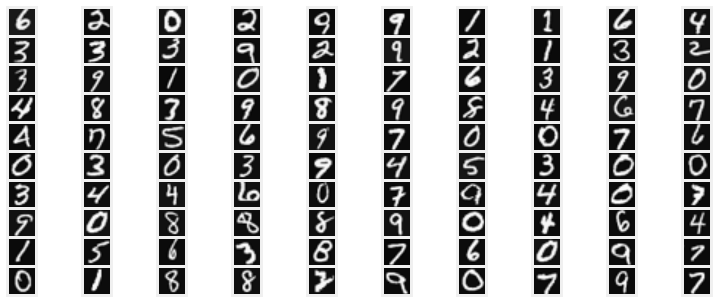

In [4]:
def display_data(X):
    nrows = ncols = 10
    ix = random.randint(0, X.shape[0]-1, nrows * ncols)
    p, axs = plt.subplots(nrows=nrows, ncols=ncols)
    k = 0
    for i in range(nrows):
        for j in range(ncols):
            axs[i, j].imshow(X[ix[k]].reshape((20,20)).T, cmap=cm.Greys_r)
            axs[i, j].grid(False)
            setp(axs[i,j].get_xticklabels(), visible=False)
            setp(axs[i,j].get_yticklabels(), visible=False)
            k += 1
    tight_layout(pad=0)
display_data(X)

### 1.3 Vectorizing Logistic Regression

In [79]:
def sigmoid(z):
    return 1. / (1. + exp(-z))

def costfun(theta, x, y, lam=None):
    # the cost function
    x, y = asarray(x), asarray(y)
    z = dot(x, theta)
    ht = sigmoid(z)
    m, n = x.shape
    ht[where(ht >= 1.)] = .99
    J = (-dot(y, log(ht)) - dot((1 - y), log(1 - ht))) / m
    if lam is not None:
        J += lam / 2. / m * dot(theta[1:], theta[1:])
    return J

def costfun_grad(theta, x, y, lam=None):
    # the cost function gradient
    x, y = asarray(x), asarray(y)
    z = dot(x, theta)
    ht = sigmoid(z)
    m, n = x.shape
    grad = dot(x.T, ht - y) / m
    if lam is not None:
        grad[1:] += lam / m * theta[1:]
    return grad

### 1.4 One-vs-All Classification

In [93]:
def one_vs_all(X, y, num_labels, lam=None):
    """trains multiple logistic regression classifiers and returns all
    the classifiers in a matrix all_theta, where the i-th row of all_theta
    corresponds to the classifier for label i
   
    """
    # Some useful variables
    m, n = X.shape

    # You need to return the following variables correctly
    all_theta = zeros((num_labels, n + 1))

    # Add ones to the X data matrix
    X = column_stack((ones(m), X))

    for c in range(num_labels):
        theta = zeros(n+1)
        b = array(y == c, dtype=int)
        all_theta[c] = fmin_cg(costfun, theta, disp=0, args=(X, b, lam),
                               fprime=costfun_grad)
    return all_theta

In [90]:
lam = .1
theta = one_vs_all(X, y, num_labels, lam)

### 1.4.1 One-vs-All Prediction

In [89]:
def predict_one_vs_all(theta, X):
    m = X.shape[0]
    num_labels = theta.shape[0]

    # Add ones to the X data matrix
    X = column_stack((ones(m), X))

    sig = sigmoid(dot(X, theta.T))
    return argmax(sig, axis=1)

In [91]:
p = predict_one_vs_all(theta, X)
# Training Set Accuracy 
acc = mean(array(p == y, dtype=float)) * 100
acc

96.439999999999998

## 2. Neural Networks

### 2.1 Model Representation

In [143]:
m = loadmat('data/ex3data1.mat')
X = m['X']
y = m['y'].flatten()
y[where(y==10)] = 0
m = loadmat('data/ex3weights.mat')
Theta1 = m['Theta1']
Theta2 = m['Theta2']

### 2.2 Feedforward Propagation and Prediction

In [154]:
def cycle(a):
    # cycles numbers to account for the training set labeling 0 as 10
    a += 1
    a[where(a==10)] = 0
    return a

def predict(theta_1, theta_2, X):
    """Predict the label of an input given a trained neural network

    """
    X = asarray(X)
    m = X.shape[0]

    X = column_stack((ones(m), X))
    a1 = column_stack((ones(m), sigmoid(dot(X, theta_1.T))))
    htheta = sigmoid(dot(a1, theta_2.T))
    return cycle(argmax(htheta, axis=1))

In [152]:
p = predict(Theta1, Theta2, X)
# Training Set Accuracy 
acc = mean(array(p == y, dtype=float)) * 100
acc

97.519999999999996

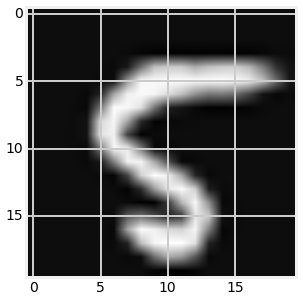

[5]


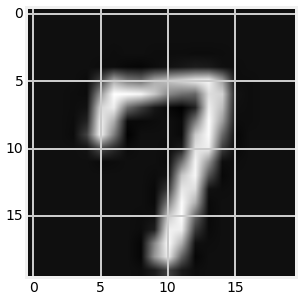

[7]


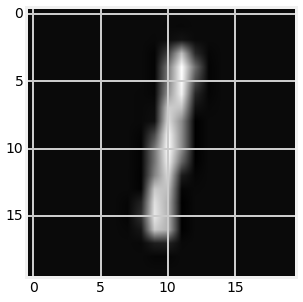

[1]


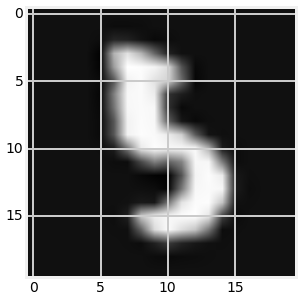

[5]


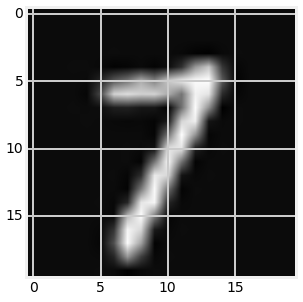

[7]


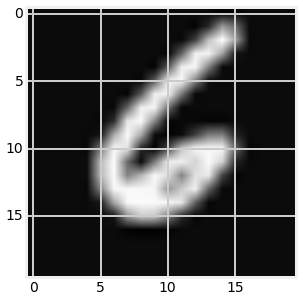

[6]


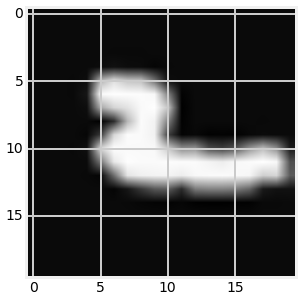

[4]


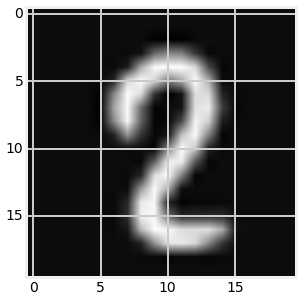

[8]


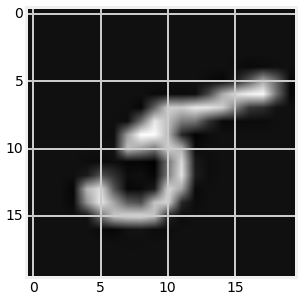

[5]


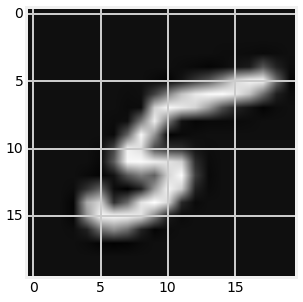

[5]


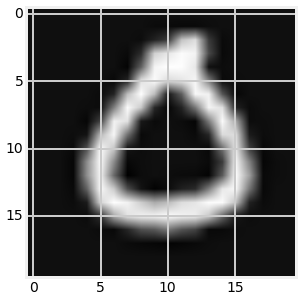

[0]


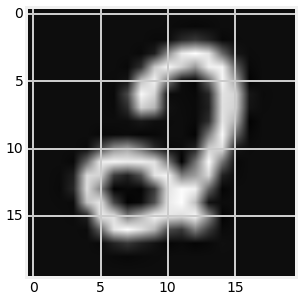

[2]


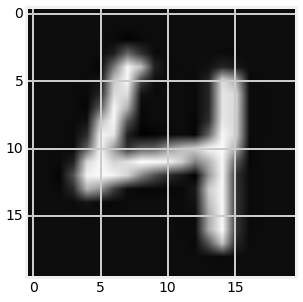

[4]


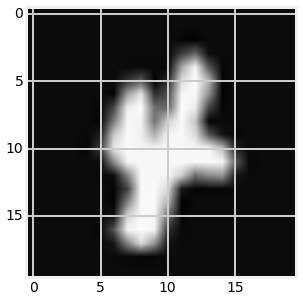

[4]


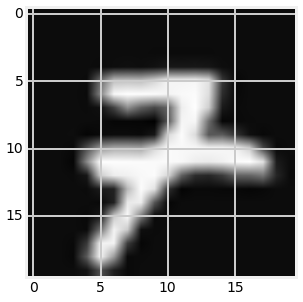

[7]


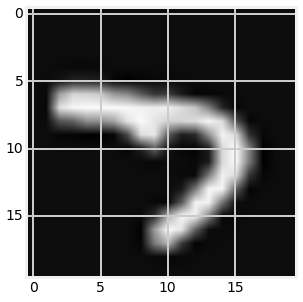

[7]


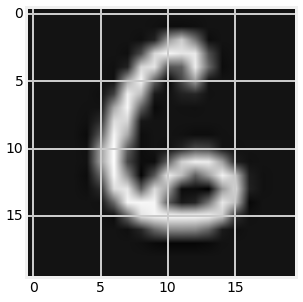

[6]


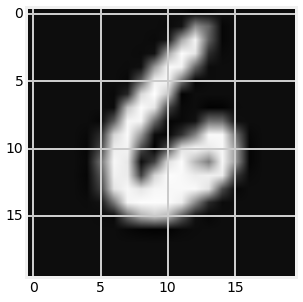

[6]


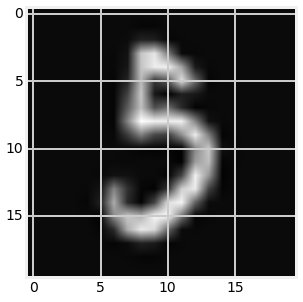

[5]


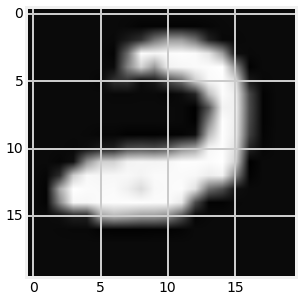

[2]


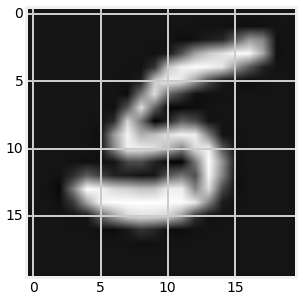

[5]


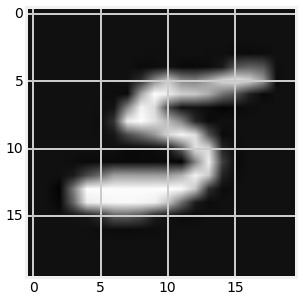

[5]


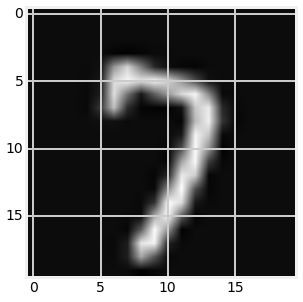

[7]


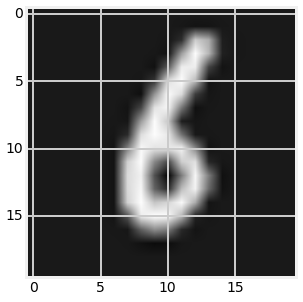

[6]


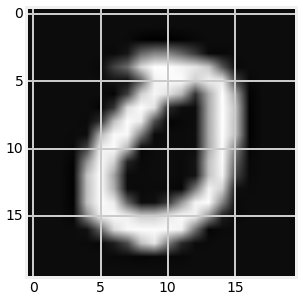

[0]


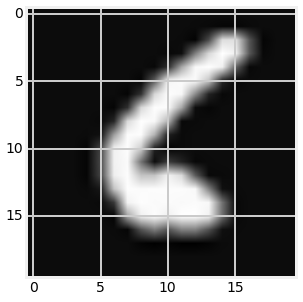

[6]


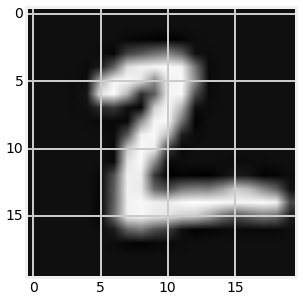

[2]


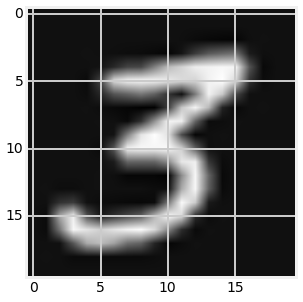

[3]


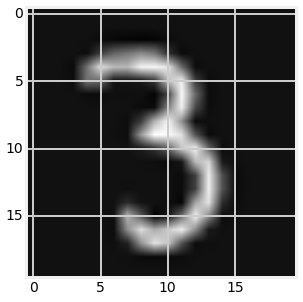

[3]


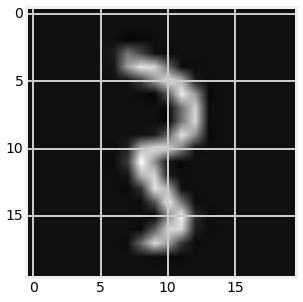

[3]


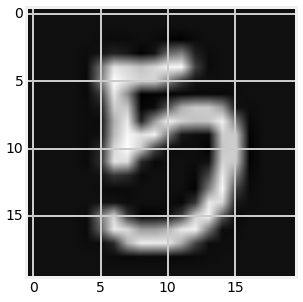

[5]


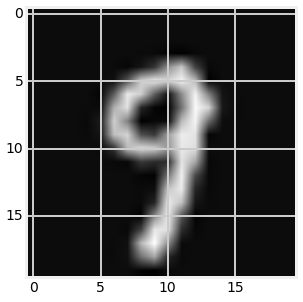

[9]


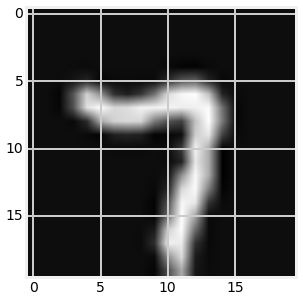

[7]


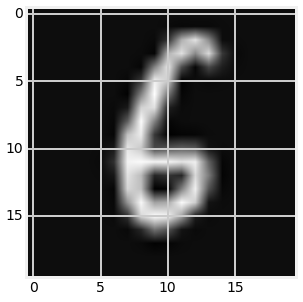

[6]


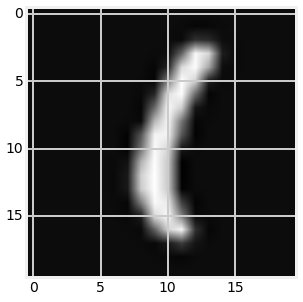

[1]


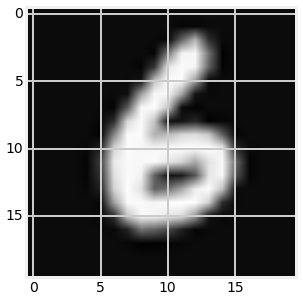

[6]


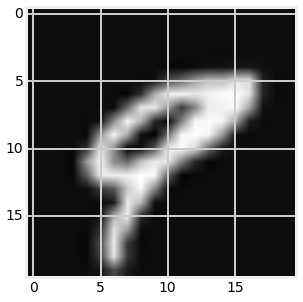

[9]


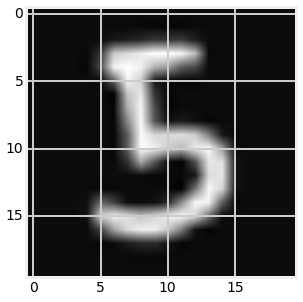

[5]


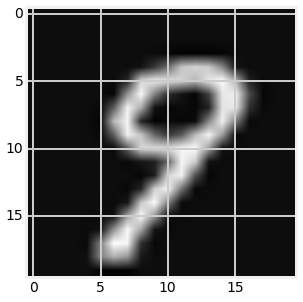

[9]


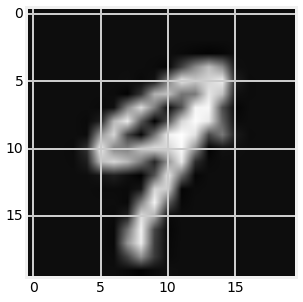

[9]


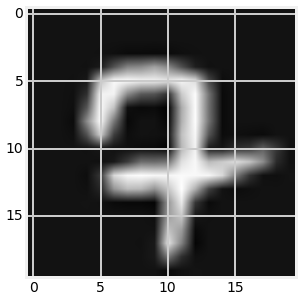

[7]


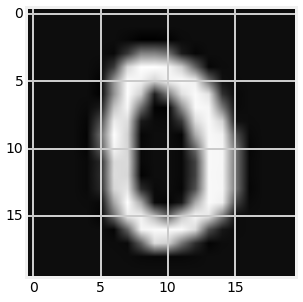

[0]


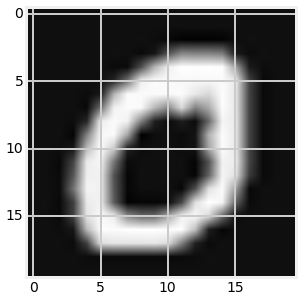

[0]


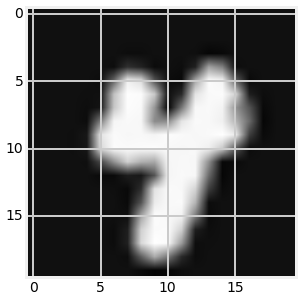

[4]


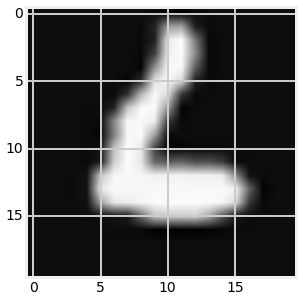

[6]


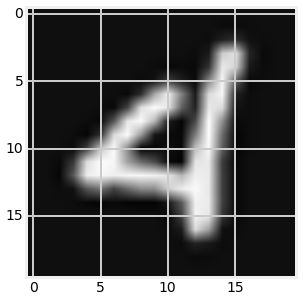

[4]


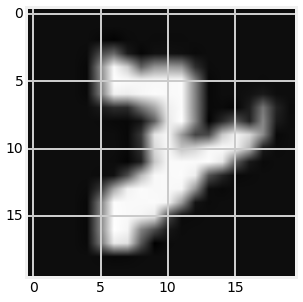

[2]


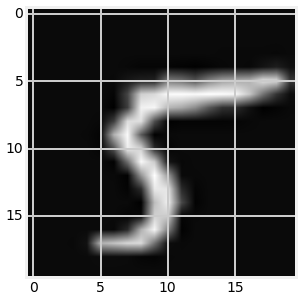

[5]


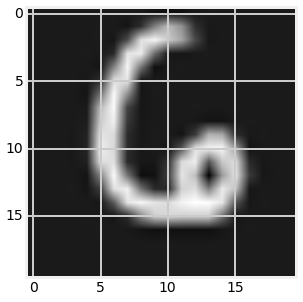

[6]


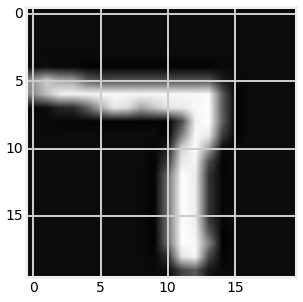

[7]


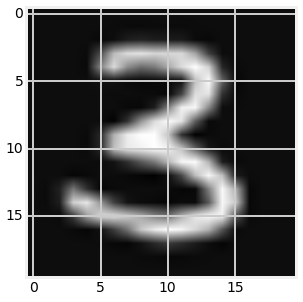

[3]


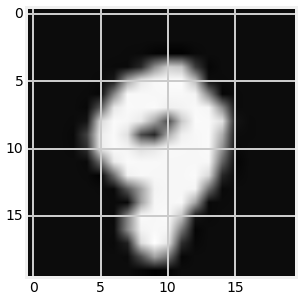

[9]


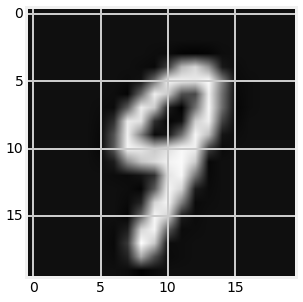

[9]


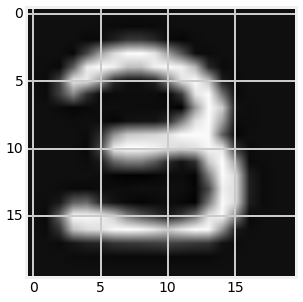

[3]


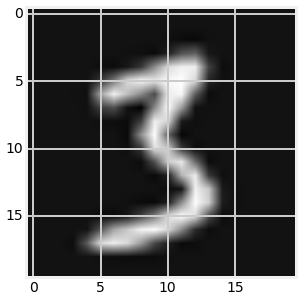

[3]


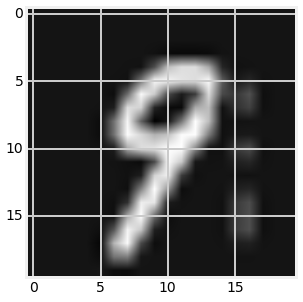

[9]


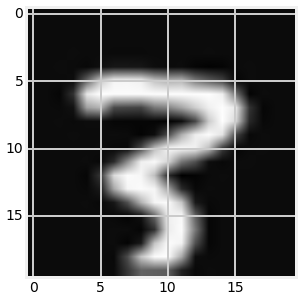

[7]


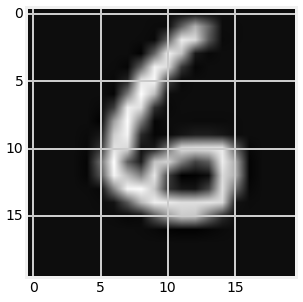

[6]


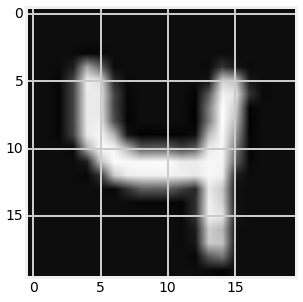

[4]


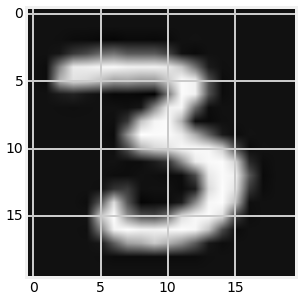

[3]


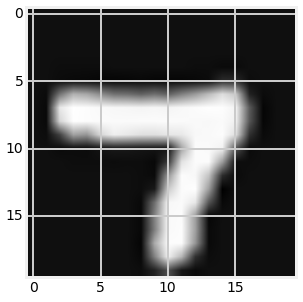

[7]


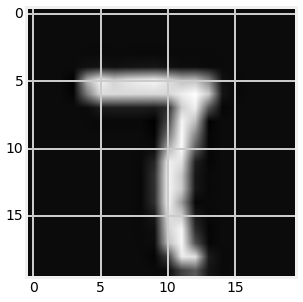

[7]


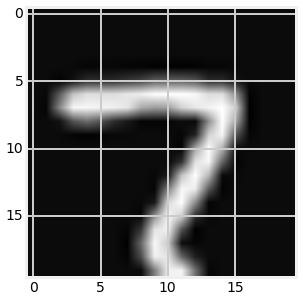

[7]


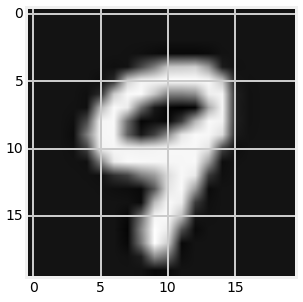

[9]


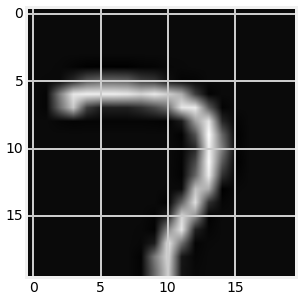

[7]


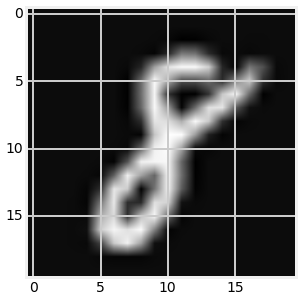

[8]


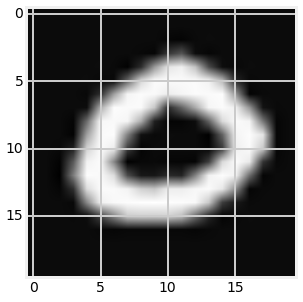

[0]


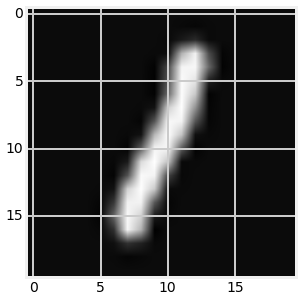

[1]


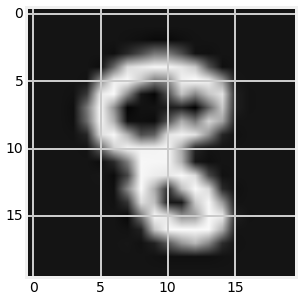

[8]


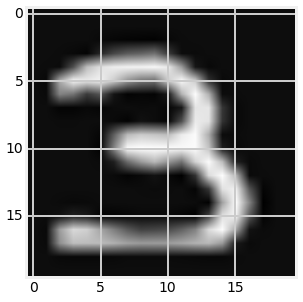

[3]


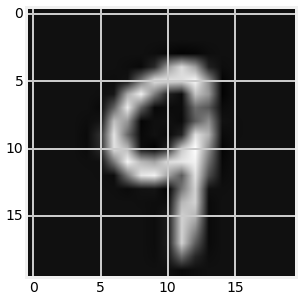

[9]


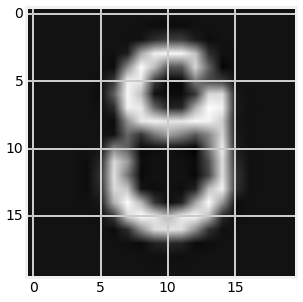

[0]


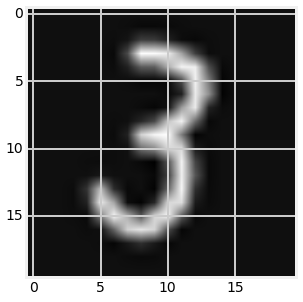

[3]


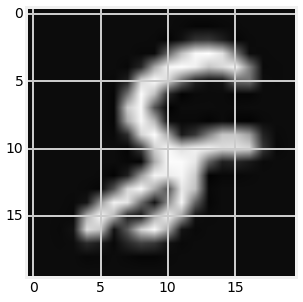

[8]


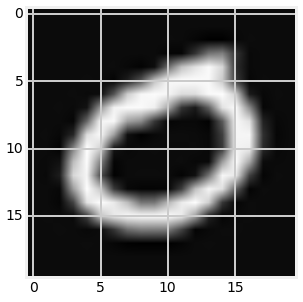

[0]


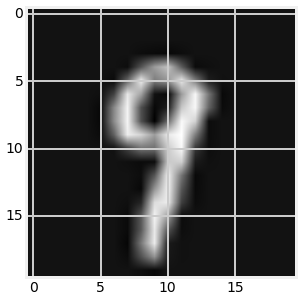

[9]


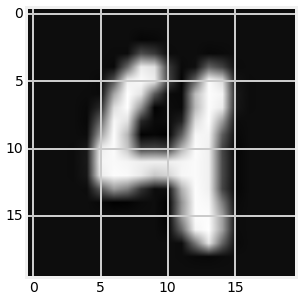

[4]


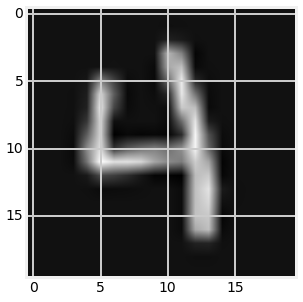

[4]


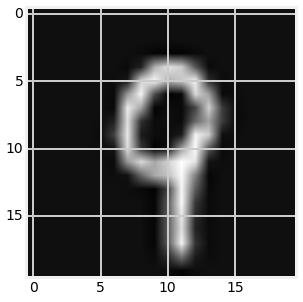

[9]


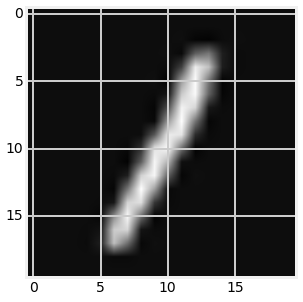

[1]


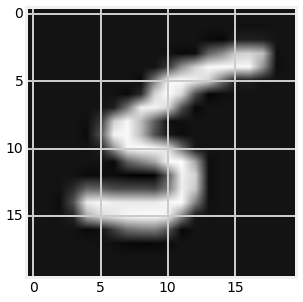

[5]


KeyboardInterrupt: 

In [153]:
# This loop will take a long time to run, push the stop button to
# halt execution if you don't want to wait.
ix = arange(X.shape[0])
random.shuffle(ix)
for i in range(X.shape[0]):
    j = ix[i]
    imshow(X[j].reshape((20,20)).T, cmap=cm.Greys_r)
    tight_layout(pad=0)
    show()
    print predict(Theta1, Theta2, X[j:j+1])